<a href="https://colab.research.google.com/github/sanjayi2000/MachineLearning/blob/main/2348552_MLPP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

i) f(x) = x^2 - 2x + 2

In [2]:
def f(x):
    return x**2 - 2*x + 2

def df(x):
    return 2*x - 2

def gradient_descent(starting_point, learning_rate, n_iterations, tolerance):
    x = starting_point
    x_history = [x]
    for i in range(n_iterations):
        grad = df(x)
        x_new = x - learning_rate * grad
        if abs(x_new - x) < tolerance:
            print(f"Convergence reached after {i+1} iterations.")
            return x_new, x_history
        x = x_new
        x_history.append(x)
    print(f"Ended after {n_iterations} iterations.")
    return x, x_history

In [3]:
starting_point = 0
learning_rate = 0.1
n_iterations = 100
tolerance = 1e-6

minima, x_history = gradient_descent(starting_point, learning_rate, n_iterations, tolerance)

Convergence reached after 56 iterations.


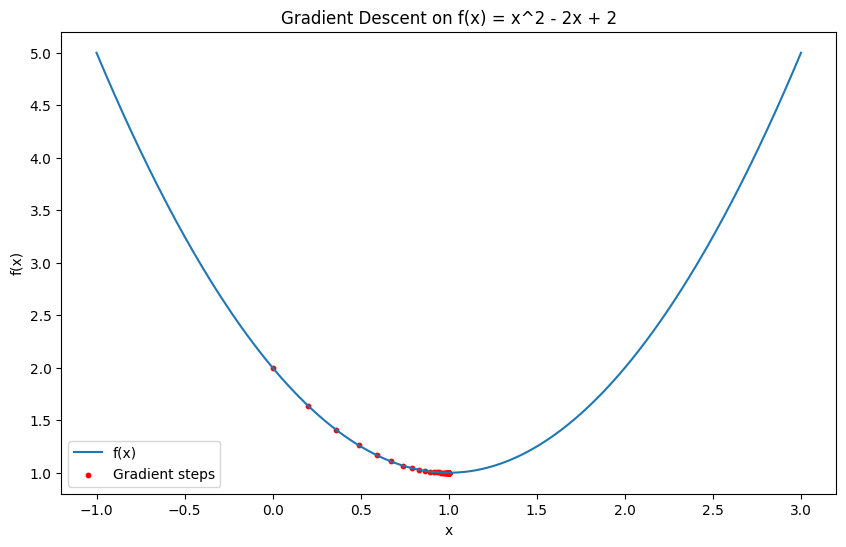

In [4]:
x_range = np.linspace(-1, 3, 400)
plt.figure(figsize=(10, 6))
plt.plot(x_range, f(x_range), label="f(x)")
plt.scatter(x_history, [f(x) for x in x_history], color='red', s=10, label="Gradient steps")
plt.title("Gradient Descent on f(x) = x^2 - 2x + 2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

ii) f(x, y) = (1 - x)^2 + 100(y - x^2)^2

In [5]:
def f(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def df(x, y):
    dfdx = -2 * (1 - x) - 400 * x * (y - x**2)
    dfdy = 200 * (y - x**2)
    return np.array([dfdx, dfdy])

def gradient_descent_2d(starting_point, learning_rate, n_iterations, tolerance):
    point = np.array(starting_point)
    point_history = [point]
    for i in range(n_iterations):
        grad = df(point[0], point[1])
        new_point = point - learning_rate * grad
        if np.linalg.norm(new_point - point) < tolerance:
            print(f"Convergence reached after {i+1} iterations.")
            return new_point, point_history
        point = new_point
        point_history.append(point)
    print(f"Ended after {n_iterations} iterations.")
    return point, point_history

In [6]:
starting_point = (0, 0)
learning_rate = 0.001
n_iterations = 10000
tolerance = 1e-6

minima, point_history = gradient_descent_2d(starting_point, learning_rate, n_iterations, tolerance)

Ended after 10000 iterations.


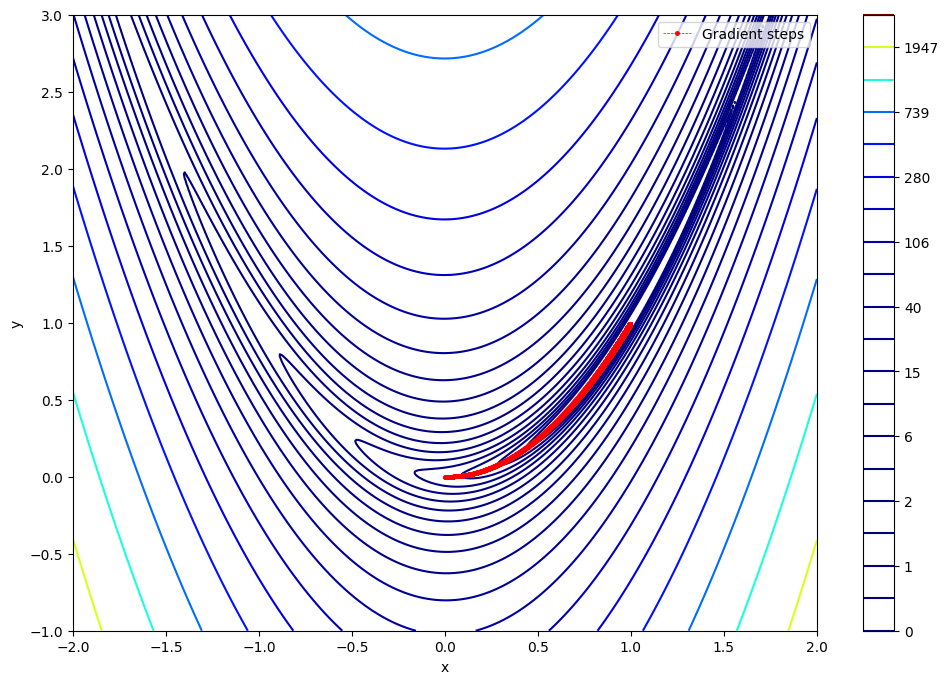

In [7]:
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-1, 3, 400)
x, y = np.meshgrid(x_range, y_range)
z = f(x, y)

plt.figure(figsize=(12, 8))
cp = plt.contour(x, y, z, np.logspace(-0.5, 3.5, 20), cmap='jet')
plt.colorbar(cp)
points = np.array(point_history)
plt.plot(points[:, 0], points[:, 1], color="red", marker=".", markersize=5, linestyle="--", linewidth=0.5, label="Gradient steps")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()